# Project: TMDB Movie Dataset

I selected the TMDB movie dataset from Kaggle to investigate. The dataset was cleaned and provided by Udacity. The data in the dataset comes from The Movie Database API and it contains basic information about 5000+ movies, such as, user ratings, popularity, revenue data, etc.

The objective of this project is to investigate the provided dataset in order to discover relevant properties that are associated with the movies.

In [1]:
# packages that I plan to use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data Wrangling

In [2]:
def display_row_col(df):
    columns, rows = df.shape
    return "There is {} rows and {} columns in the dataset".format(columns, rows)

In [3]:
# LOAD DATASET
movies_df = pd.read_csv('tmdb-movies.csv')

First we need to obtain basic info about the data, such as, numbers of rows and columns, columns datatypes, numbers of null values, numbers of duplicates, and dataset descritive stats

In [4]:
# CHECK FIRST ROWS IN THE DATASET
movies_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


The dataset have multiples values that are separated by the pipe character. It contains numerical and non-numerical values that we need to find out if those columns are needed for future analysis.

### Research Questions:
    By investigating the data I planing on getting some insights about:
       => Quantitative:
        1 - What was the budget for the 5 top movies made?
        2 - What was the revenue for the 5 top movies?
        3 - What are the 5 top movies with the highest vote count?
        
       => Categorical
        4 - What are the 5 top most popular movies?
        5 - What are the 5 top most popular director and cast?
        6 - What are the 5 top genres and visualize it? 
        7 - Does the runtime affect the movie success?
        8 - What are the number of movies release per month? Visualize it
          

In [5]:
# CHECK NUMBER OF COLUMNS AND ROWS AND PRINT RESULT
#columns, rows = movies_df.shape
#print("The dataset consist of {} columns and {} rows".format(columns, rows))
display_row_col(movies_df)

'There is 10866 rows and 21 columns in the dataset'

In [6]:
# CHECK DATAFRAME INDEX dtype AND COLUMNS dtypes, non-null VALUES and MEMORY USAGE
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [7]:
# nulls VALUES SUM
movies_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

As we can see there is a total of 10866 rows and 21 columns. Columns like imdb_id, cast, homepage, director, tagline, keywords, overview, genres, and production_companies have null values. For the research, columns such as id, imdb_id, original_title, homepage, tagline, keywords, overview, production_companies are not needed. I will assumed that the dollars is the currency used in here.

In [8]:
# CHECK DESCRIPTIVE STATs THAT SUMMARIZE THE CENTRAK TENDENCY, DISPERSION AND SHAPE OF THE DATASET
movies_df.describe().round()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.0,10866.0,10866.0,1.086600e+04,10866.0,10866.0,10866.0,10866.0,10866.0,1.086600e+04
mean,66064.0,1.0,14625701.0,3.982332e+07,102.0,217.0,6.0,2001.0,17551040.0,5.136436e+07
std,92130.0,1.0,30913214.0,1.170035e+08,31.0,576.0,1.0,13.0,34306156.0,1.446325e+08
min,5.0,0.0,0.0,0.000000e+00,0.0,10.0,2.0,1960.0,0.0,0.000000e+00
25%,10596.0,0.0,0.0,0.000000e+00,90.0,17.0,5.0,1995.0,0.0,0.000000e+00
50%,20669.0,0.0,0.0,0.000000e+00,99.0,38.0,6.0,2006.0,0.0,0.000000e+00
75%,75610.0,1.0,15000000.0,2.400000e+07,111.0,146.0,7.0,2011.0,20853251.0,3.369710e+07
max,417859.0,33.0,425000000.0,2.781506e+09,900.0,9767.0,9.0,2015.0,425000000.0,2.827124e+09


Budget, revenue, and runtime columns contain a lot of missing values. It is something that need to be fix in order to avoid wrong data and visualization errors.

In [9]:
# FIND NUMBER OF DUPLICATED ROWS
movies_df.duplicated().sum()

1

In [10]:
# FIND THOSE DUPLICATED ROWS
movies_df[movies_df.duplicated(keep=False)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


As we can see, there is a only one duplicate row.

## Data Cleaning

#### Task 1 - Remove duplicated rows 

In [11]:
# DROP DUPLICATED ROW
movies_df.drop_duplicates(keep = 'first', inplace = True)

# DISPLAY NUMBER OF COLUMNS AND ROWS
display_row_col(movies_df)

'There is 10865 rows and 21 columns in the dataset'

#### Task 2 - Create and delete list of columns that are not needed

In [12]:
# LIST OF COLUMNS TO BE DELETED FROM DATAFRAME
del_col = ['id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies']

# DELETE COLUMNS FROM DATAFRAME
movies_df_narrowed = movies_df.drop(del_col, axis=1)

# DISPLAY FIRST FEW ROWS OF THE REDUCED DATAFRAME
movies_df_narrowed.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [13]:
# DISPLAY NUMBER OF COLUMNS AND ROWS
display_row_col(movies_df_narrowed)

'There is 10865 rows and 14 columns in the dataset'

#### Task 3 - Replace 0s with NaN and drop data

In [14]:
# LIST OF COLUMNS THAT MUST HAVE 0 TO NaN
cols = ['budget', 'revenue', 'runtime', 'cast', 'director']

# REPLACE 0s TO NaN
movies_df_narrowed[cols] = movies_df_narrowed[cols].replace(0, np.NaN)

# DROP NaN VALUES
movies_df_narrowed.dropna(subset = cols, inplace = True)

# DISPLAY NUMBER OF COLUMNS AND ROWS
display_row_col(movies_df_narrowed)

'There is 3849 rows and 14 columns in the dataset'

#### Task 4 - Change release_date column to a datetime format

In [15]:
# CHANGE release_date col to a datetime format
movies_df_narrowed['release_date'] = pd.to_datetime(movies_df_narrowed['release_date'])

# DISPLAY FIRST FEW ROWS OF THE REDUCED DATAFRAME
movies_df_narrowed.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


#### Task 5 - Add column that will hold months

In [16]:
#  CREATE COLUMN CALLED MONTH
movies_df_narrowed['month'] = movies_df_narrowed['release_date'].apply(lambda x: x.month)
movies_df_narrowed['year'] = movies_df_narrowed['release_date'].apply(lambda x: x.year)

# DISPLAY FIRST FEW ROWS OF THE REDUCED DATAFRAME
movies_df_narrowed.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,month,year
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,6,2015
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,5,2015
2,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,3,2015
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,12,2015
4,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,4,2015


Columns month and year were added to facilite analysis and visualization

#### Task 6 - Check df info

In [17]:
movies_df_narrowed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3849 entries, 0 to 10848
Data columns (total 16 columns):
popularity        3849 non-null float64
budget            3849 non-null float64
revenue           3849 non-null float64
original_title    3849 non-null object
cast              3849 non-null object
director          3849 non-null object
runtime           3849 non-null float64
genres            3849 non-null object
release_date      3849 non-null datetime64[ns]
vote_count        3849 non-null int64
vote_average      3849 non-null float64
release_year      3849 non-null int64
budget_adj        3849 non-null float64
revenue_adj       3849 non-null float64
month             3849 non-null int64
year              3849 non-null int64
dtypes: datetime64[ns](1), float64(7), int64(4), object(4)
memory usage: 511.2+ KB


In [18]:
movies_df_narrowed.isnull().sum()

popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
month             0
year              0
dtype: int64

The dataset looks pretty neat now. Now, dataframe is smaller and easy to work with. Nulls were replaced with NaN and the dropped from Dataframe.

# Exploratory Data Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AE51954940>,
      dtype=object)

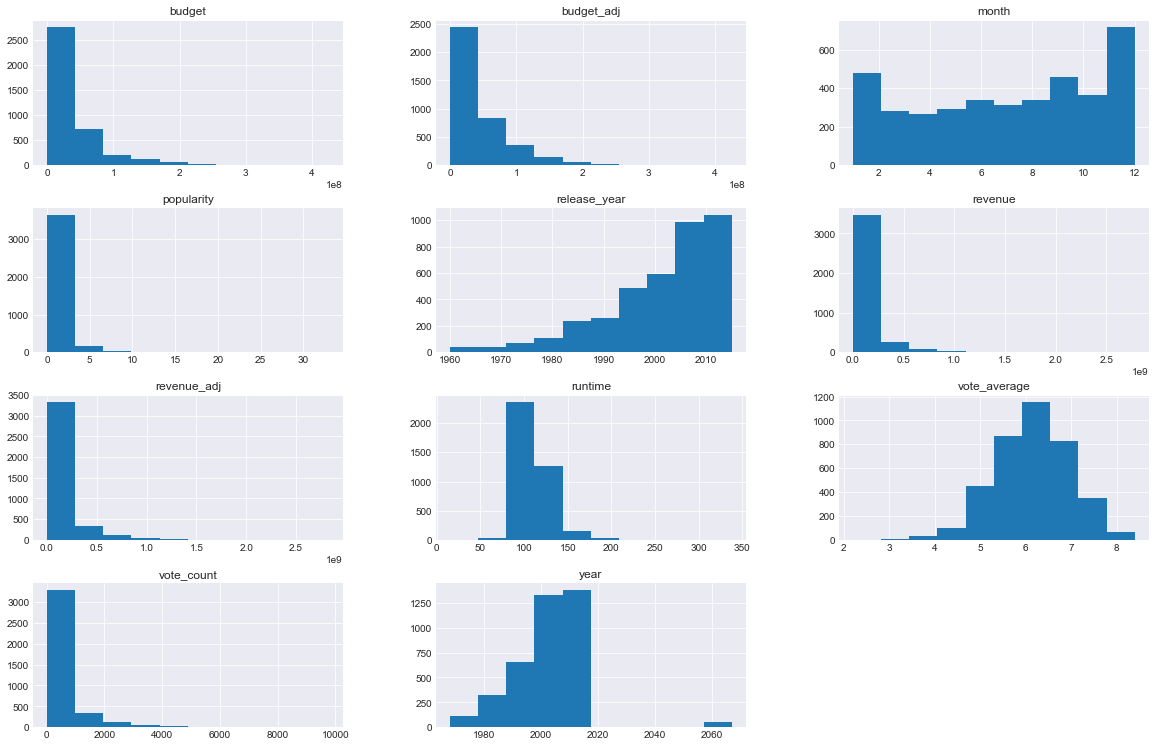

In [19]:
# VARs DISTRIBUTION
# HIST OF THE DATA
sns.set_style("darkgrid")
movies_df_narrowed.hist(figsize=(20,13))

In [20]:
def explore_top_five(df, col_name, display_col1, display_col2):
    #display_col2 = col_name
    return df[df[col_name].notnull()][[display_col1, col_name, display_col2]].sort_values(col_name, ascending=False).head()

##### 1 - What was the revenue for the 5 top movies made?

In [21]:
# def explore_five(df, col_name, display_col1, display_col2, display_col3)
# movies_df_narrowed[movies_df_narrowed['revenue'].notnull()][['original_title', 'revenue', 'release_date']].sort_values('revenue', ascending=False).head(5)
explore_top_five(movies_df_narrowed, 'revenue', 'original_title', 'release_date')

,original_title,revenue,release_date
1386,Avatar,2.781506e+09,2009-12-10
3,Star Wars: The Force Awakens,2.068178e+09,2015-12-15
5231,Titanic,1.845034e+09,1997-11-18
4361,The Avengers,1.519558e+09,2012-04-25
0,Jurassic World,1.513529e+09,2015-06-09


Avatar hold the first place for movie that produce the most revenue

##### 2 - What was the budget for the 5 top movies?

In [22]:
explore_top_five(movies_df_narrowed, 'budget', 'original_title', 'release_date')

,original_title,budget,release_date
2244,The Warrior's Way,425000000.0,2010-12-02
3375,Pirates of the Caribbean: On Stranger Tides,380000000.0,2011-05-11
7387,Pirates of the Caribbean: At World's End,300000000.0,2007-05-19
14,Avengers: Age of Ultron,280000000.0,2015-04-22
6570,Superman Returns,270000000.0,2006-06-28


The Warrior's Way has the largest budget for a movie

##### 3 - What are the 5 top movies with the highest vote count?

In [23]:
explore_top_five(movies_df_narrowed, 'vote_count', 'original_title', 'release_date')

,original_title,vote_count,release_date
1919,Inception,9767,2010-07-14
4361,The Avengers,8903,2012-04-25
1386,Avatar,8458,2009-12-10
2875,The Dark Knight,8432,2008-07-16
4364,Django Unchained,7375,2012-12-25


Here we found Inception holding the first place on vote count

##### 4 - What are the 5 top most popular movies?

In [24]:
explore_top_five(movies_df_narrowed, 'popularity', 'original_title', 'release_date')

,original_title,popularity,release_date
0,Jurassic World,32.985763,2015-06-09
1,Mad Max: Fury Road,28.419936,2015-05-13
629,Interstellar,24.949134,2014-11-05
630,Guardians of the Galaxy,14.311205,2014-07-30
2,Insurgent,13.112507,2015-03-18


Jurassic World is the most popular movie followed by Mad Max: Fury Road

##### 5 - What are the 5 top most popular director and cast?

In [25]:
def top_five(col_name):
    #SEPARATE THE STRING BY '|' 
    d = movies_df_narrowed[col_name].str.cat(sep = '|')
    
    #STORE THE DATA
    d = pd.Series(d.split('|'))
    
    #VALUES COUNT
    result = d.value_counts(ascending = False)
    
    return result

In [26]:
#STORE RETURN VALUES
top_cast = top_five('cast')

# DISPLAY TOP CAST
top_cast.head()

Robert De Niro       52
Bruce Willis         46
Samuel L. Jackson    44
Nicolas Cage         43
Matt Damon           36
dtype: int64

Robert De Niro is the cast associated with the most popular movies followed by Bruce Willis

In [27]:
# STORE RETURN VALUES
top_dir = top_five('director')

# DISPLAY TOP DIR
top_dir.head()

Steven Spielberg    28
Clint Eastwood      24
Ridley Scott        21
Woody Allen         18
Martin Scorsese     17
dtype: int64

Steven Spielberg is the director associated with the most popular movies followed by Client Eastwood

##### 6 - What are the 5 top genres and visualize it? 

In [28]:
#STORE RETURN VALUES
top_genres = top_five('genres')

# DISPLAY TOP DIR
top_genres.head()

Drama        1753
Comedy       1357
Thriller     1203
Action       1085
Adventure     749
dtype: int64

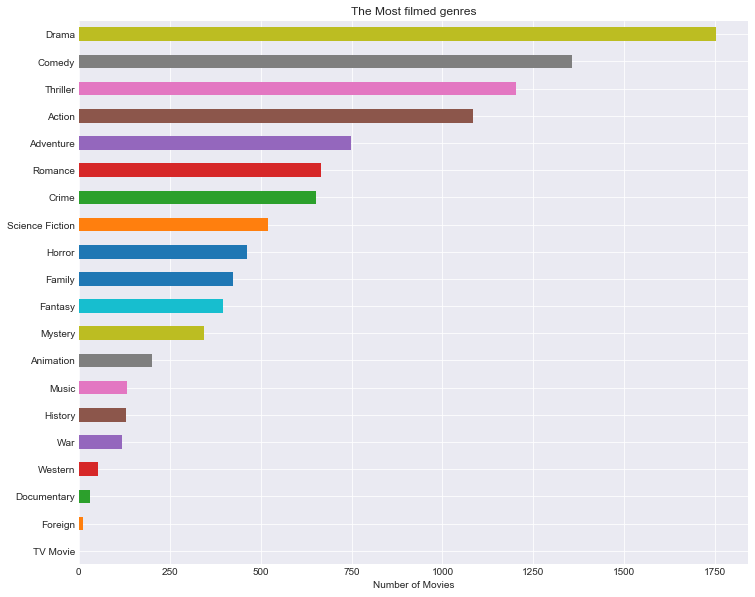

In [29]:
# SORT VALUES 
top_genres.sort_values(ascending = True, inplace = True)

#ax = top_genres.plot.bar()
ax = top_genres.plot.barh()

# PLOT TITLE
ax.set(title = "The Most filmed genres")

# X LABEL
ax.set_xlabel("Number of Movies")

# FIGURE SIZE
ax.figure.set_size_inches(12, 10)

# SHOW PLOT
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001AE520CCCF8>],
      dtype=object)

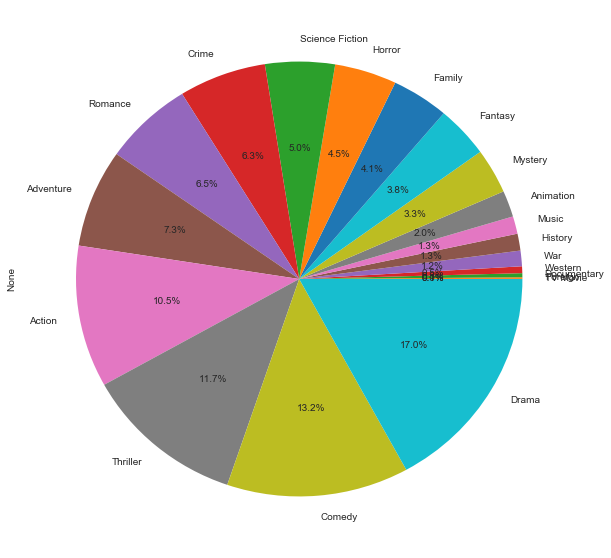

In [30]:
top_genres.plot.pie(subplots=True, figsize=(10, 10), autopct='%.1f%%')

Dramas, comedy, thriller, action are associated with the most popular movies

##### 7 - What month prodoce the most revenue?

In [31]:
month_rev = movies_df_narrowed.groupby('month')['revenue_adj'].sum()
month_rev

month
1     1.607863e+10
2     2.141533e+10
3     3.698163e+10
4     2.964133e+10
5     5.957570e+10
6     7.835014e+10
7     5.516945e+10
8     3.005392e+10
9     2.912211e+10
10    3.675235e+10
11    5.613992e+10
12    7.892283e+10
Name: revenue_adj, dtype: float64

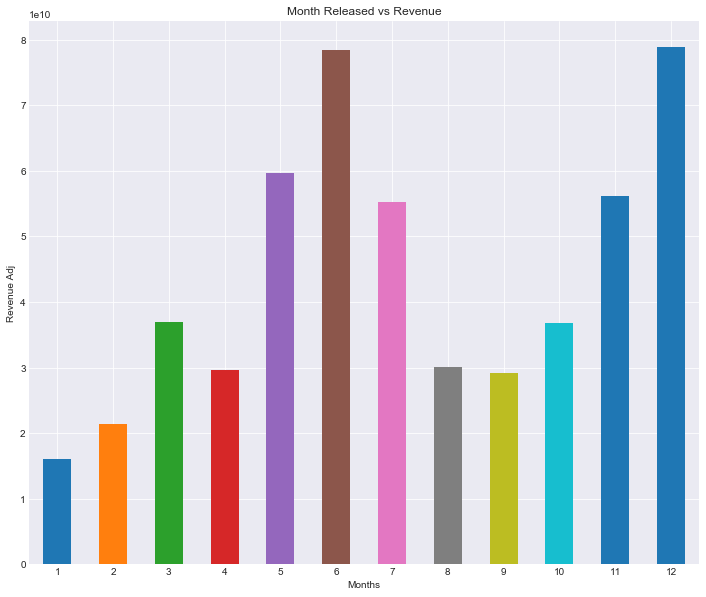

In [32]:
ax = month_rev.plot.bar(rot=0)

# PLOT TITLE
ax.set_title('Month Released vs Revenue')

# X LABEL
ax.set_xlabel("Months")
ax.set_ylabel("Revenue Adj")

# FIGURE SIZE
ax.figure.set_size_inches(12, 10)

# SHOW PLOT
plt.show()

December and June are the best month.

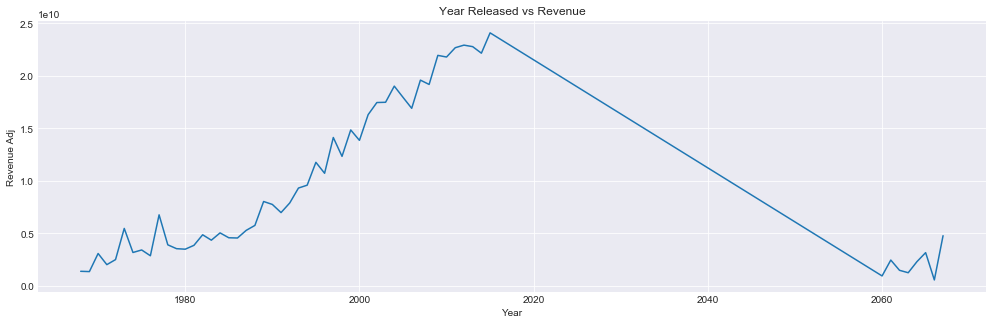

In [33]:
year_rev = movies_df_narrowed.groupby('year')['revenue_adj'].sum()
ax = year_rev.plot.line(figsize=(17, 5))

# PLOT TITLE
ax.set_title('Year Released vs Revenue')

# X LABEL
ax.set_xlabel("Year")
ax.set_ylabel("Revenue Adj")

# SHOW PLOT
plt.show()
#year_rev.plot(figsize=(22,7))

# Conclusion